In [1]:
#カーネル密度推定とは
#ヒストグラムを滑らかにしたもの
#ヒストグラムはデータポイントの個数を数える
#カーネル密度推定は、カーネル関数を用いてガウス分布をつくって足し合わせる

In [16]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [17]:
dataset = randn(25)

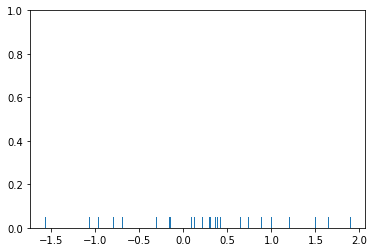

In [18]:
#データがあるところに線が引かれる
sns.rugplot(dataset)

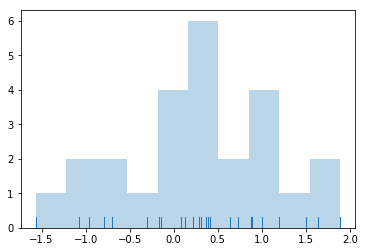

In [19]:
plt.hist(dataset, alpha=0.3)
sns.rugplot(dataset)

(0, 1)

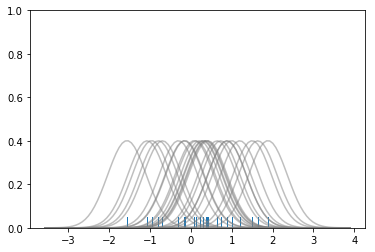

In [20]:
#正規分布の幅を調整して密度推定する
sns.rugplot(dataset);

# X軸を設定
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 全体を等間隔に100分割します。
x_axis = np.linspace(x_min,x_max,100)

#英語版Wikipediaのカーネル密度推定ページにある数式を使う
bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**0.2

#空っぽのリストを用意
kernel_list = []

#データポイントごとにカーネルをつくる
for data_point in dataset:
    #カーネル密度関数
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)

    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

#Y軸を0から1に
plt.ylim(0,1)

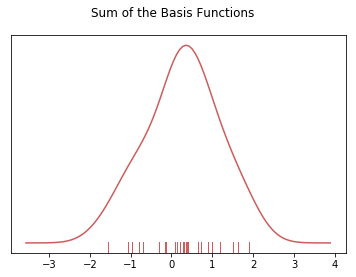

In [21]:
# 手動でKDE（Kernel density estimation=カーネル密度推定）のグラフを作ります。
sum_of_kde = np.sum(kernel_list,axis=0)

fig = plt.plot(x_axis,sum_of_kde,color='indianred')

sns.rugplot(dataset,c = 'indianred')

#軸を消す
plt.yticks([])

#日本語も書けるが、何も設定しない場合は文字化けする
plt.suptitle("Sum of the Basis Functions")

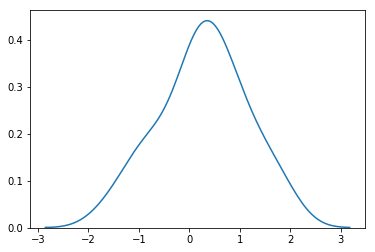

In [22]:
#seabornを使うと1行で終わり
sns.kdeplot(dataset)

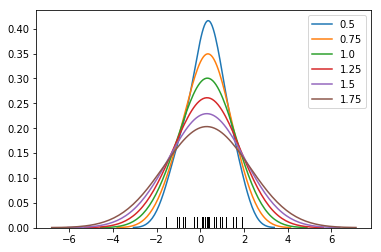

In [23]:
sns.rugplot(dataset,color='black')
# バンド幅を変えてみましょう。
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,label=bw)

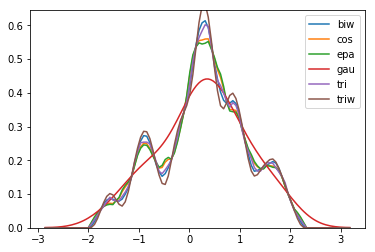

In [25]:
#ガウス関数以外にも選べる
kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]

for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

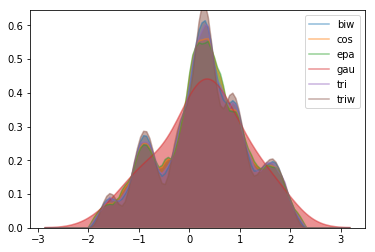

In [26]:
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True,alpha=0.5)

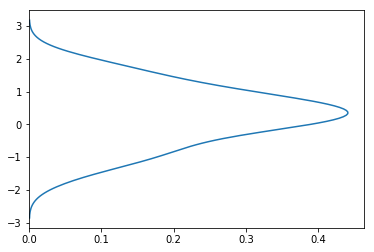

In [27]:
# 軸を入れ替えることもできます。
sns.kdeplot(dataset,vertical=True)

In [29]:
#cumulative distribution function (CDF)
#累積分布関数
#http://en.wikipedia.org/wiki/Cumulative_distribution_function

(array([  1.,   3.,   5.,   6.,  10.,  16.,  18.,  22.,  23.,  25.]),
 array([-1.56491096, -1.21953576, -0.87416055, -0.52878534, -0.18341013,
         0.16196507,  0.50734028,  0.85271549,  1.1980907 ,  1.5434659 ,
         1.88884111]),
 <a list of 10 Patch objects>)

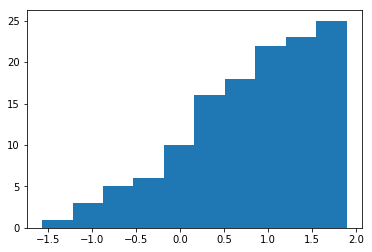

In [31]:
#累積分布関数
plt.hist(dataset, cumulative=True)

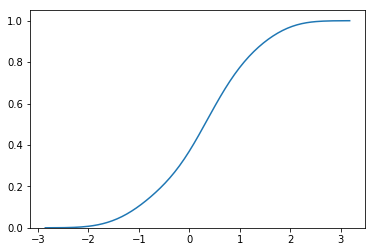

In [32]:
sns.kdeplot(dataset,cumulative=True)

C:\Users\miyazaki\Anaconda3\lib\site-packages\seaborn\distributions.py:630: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


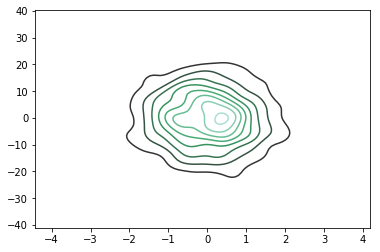

In [34]:
# 2次元平面上でも同じような# 軸ごとにデータをわたせます。
sns.kdeplot(dframe.X,dframe.Y)ことができる。中心がわかる。
mean = [0,0]
# それぞれの分散を決めます。
cov = [[1,0],[0,100]]
# これに従う多変量正規分布
dataset2 = np.random.multivariate_normal(mean,cov,1000)
# DataFrameにしておきましょう。
dframe = pd.DataFrame(dataset2,columns=['X','Y'])
# プロットします。SeabornとPandasの相性は抜群
sns.kdeplot(dframe)

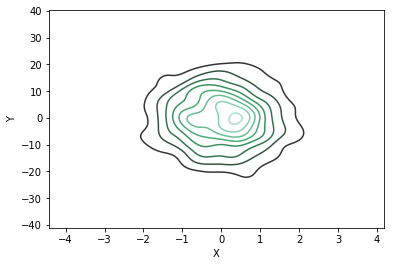

In [35]:
# 軸ごとにデータをわたせます。
sns.kdeplot(dframe.X,dframe.Y)

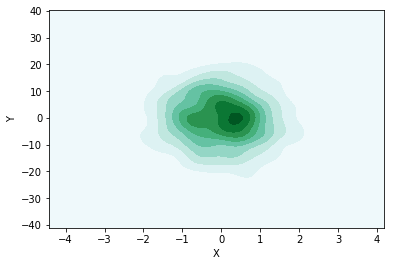

In [36]:
# 軸ごとにデータをわたせます。
sns.kdeplot(dframe.X,dframe.Y, shade=True)

C:\Users\miyazaki\Anaconda3\lib\site-packages\seaborn\distributions.py:630: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


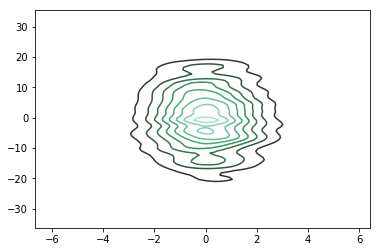

In [37]:
# バンド幅を変えられます。
sns.kdeplot(dframe,bw=1)

C:\Users\miyazaki\Anaconda3\lib\site-packages\seaborn\distributions.py:630: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


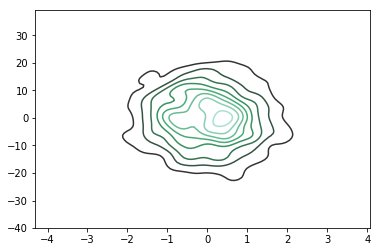

In [38]:
# 文字列でも渡せます。
sns.kdeplot(dframe,bw='silverman')

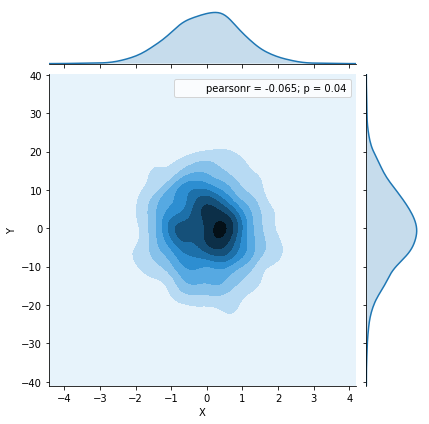

In [39]:
# 同時分布の推定も可能です。
sns.jointplot('X','Y',dframe,kind='kde')